### Planning a telescope observation


Let's build your first Markov Chain! 

You are a real astronomer (not a theory guy like me) and are planning an expensive observational campaign. You want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy). The key piece of information here is that the weather tomorrow depends on the weather today. From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$


- We can start with the sky conditions today and make predictions going forward more and more into the future.
- This will look like a big decision tree. 
- After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$

and 

$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether it was clear or cloudy on the day that you started. The steps that we have taken in this process are, indeed, a **MARKOV CHAIN**.

Here is an illustration of this process from an article in [towarddatascience.com](https://towardsdatascience.com/introduction-to-markov-chains-50da3645a50d).

![image.png](https://miro.medium.com/max/416/1*frksGjINf5oTjx7WL81U3w.png)

#### Tasks

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  
- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.
- Use a summary statistics to determine the most likely value and an error on our estimate.

**Important:** 
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***


#### Tasks

- In the above example, experiment with chopping off different numbers of initial points as burn-in.


#### More

- Redo the same for the Markovian process describing the stock market (see above in this notebook). If you've written your code well, this should require minor modifications.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.stats import median_sigmaG
from IPython.display import Markdown

## Weather Markov chain

In [4]:
#Define the weather chain

def WeatherChain(start, N):
    chain = [start]
    
    #Cloudy == 0, sunny == 1
    
    for i in range(0, N):
        if chain[i] == 1:
            chain.append(np.random.choice([0, 1], p=[0.1, 0.9]))
                
        elif chain[i] == 0:
            chain.append(np.random.choice([0, 1], p=[0.5, 0.5]))

    #Compute cumulative fraction of sunny and cloudy days
    
    chain = np.array(chain)
    sunny = np.array([len(chain[:i][np.where(chain[:i] == 1)[0]]) / i for i in range(1, N + 1)])
    cloudy = np.array([len(chain[:i][np.where(chain[:i] == 0)[0]]) / i for i in range(1, N + 1)])

    return chain, sunny, cloudy
    

In [5]:
N = 60000

#Run the chain starting from a cloudy day

chain, sunny, cloudy = WeatherChain(0, N)
days = np.arange(1, N + 1)
burn_in = 7000

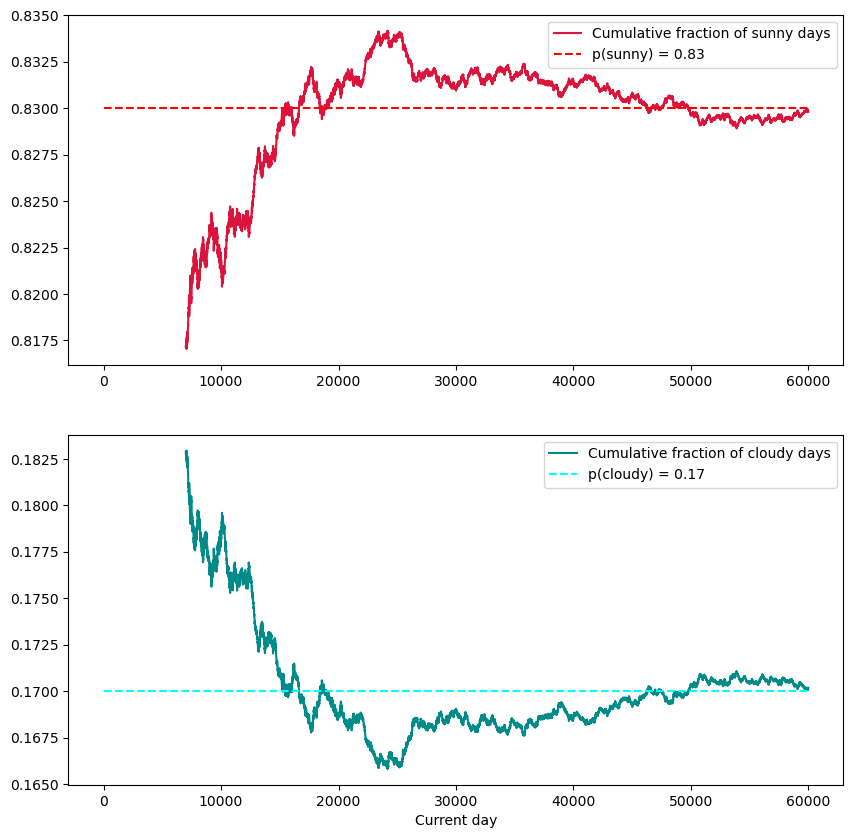

In [6]:
#Apply burn in to sunny, cloudy and total number of days

days = days[burn_in:]
sunny = sunny[burn_in:]
cloudy = cloudy[burn_in:]

#Plot sunny and cloudy days chains

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(days, sunny, color="crimson", label="Cumulative fraction of sunny days")
ax[1].plot(days, cloudy, color="darkcyan", label="Cumulative fraction of cloudy days")
ax[0].hlines(0.83, 1, max(days), linestyle="--", color="red", label="p(sunny) = 0.83")
ax[1].hlines(0.17, 1, max(days), linestyle="--", color="cyan", label="p(cloudy) = 0.17")
plt.xlabel("Current day")
ax[0].legend()
ax[1].legend()

Text(0.5, 0, 'Days')

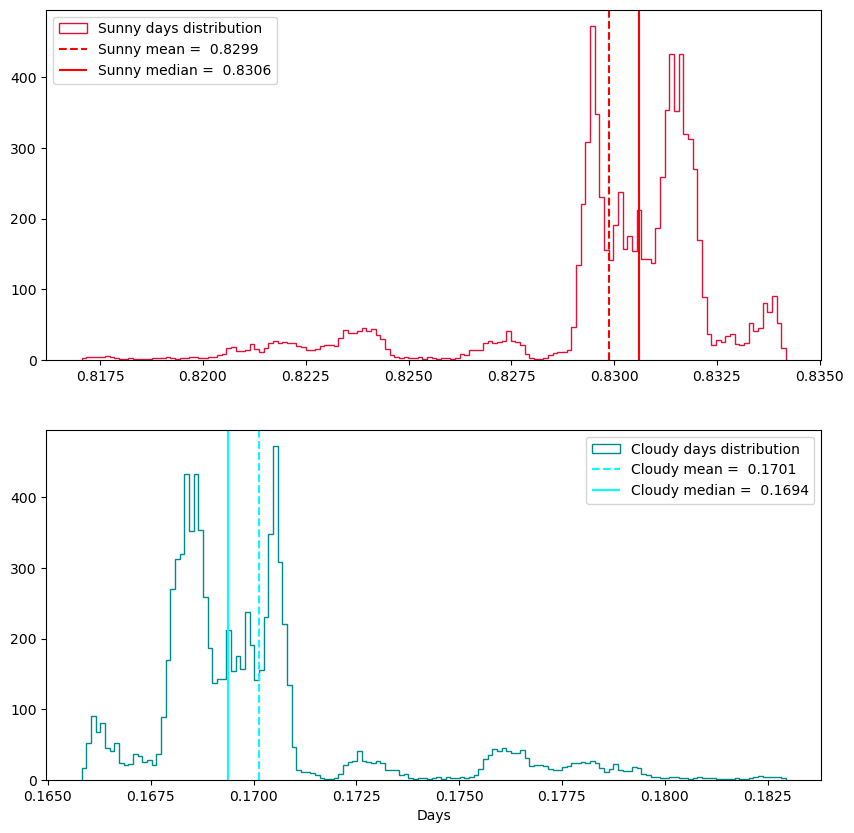

In [7]:
#Mean, std, median and sigmaG

sunny_mean = np.mean(sunny)
sunny_std = np.std(sunny) / np.sqrt(len(sunny))
sunny_median, sunny_sigmaG = median_sigmaG(sunny)

cloudy_mean = np.mean(cloudy)
cloudy_std = np.std(cloudy) / np.sqrt(len(cloudy))
cloudy_median, cloudy_sigmaG = median_sigmaG(cloudy)

#Plot sunny and cloudy distributions

fig_d, ax_d = plt.subplots(2, 1, figsize=(10, 10))
ax_d[0].hist(sunny, color="crimson", bins="fd", histtype="step", density=True, label="Sunny days distribution")
ax_d[1].hist(cloudy, color="darkcyan", bins="fd", histtype="step", density=True, label="Cloudy days distribution")
ax_d[0].vlines(sunny_mean, 0, 1, color="red", linestyle="--", transform=ax_d[0].get_xaxis_transform(), label="Sunny mean = " + f"{sunny_mean: .4f}")
ax_d[1].vlines(cloudy_mean, 0, 1, color="cyan", linestyle="--", transform=ax_d[1].get_xaxis_transform(), label="Cloudy mean = " + f"{cloudy_mean: .4f}")
ax_d[0].vlines(sunny_median, 0, 1, color="red", linestyle="-", transform=ax_d[0].get_xaxis_transform(), label="Sunny median = " + f"{sunny_median: .4f}")
ax_d[1].vlines(cloudy_median, 0, 1, color="cyan", linestyle="-", transform=ax_d[1].get_xaxis_transform(), label="Cloudy median = " + f"{cloudy_median: .4f}")
ax_d[0].legend()
ax_d[1].legend()
plt.xlabel("Days")

In [8]:
Markdown("Mean sunny day fraction:"
f"$$\mu_s = {sunny_mean: .5f} \pm {sunny_std: .5f}$$"

"Median sunny day fraction:"
f"$$m_s = {sunny_median: .3f} \pm {sunny_sigmaG: .3f}$$"

"Mean cloudy day fraction:"
f"$$\mu_c = {cloudy_mean: .5f} \pm {cloudy_std: .5f}$$"

"Median cloudy day fraction:"
f"$$m_c = {cloudy_median: .3f} \pm {cloudy_sigmaG: .3f}$$"
)

Mean sunny day fraction:$$\mu_s =  0.82988 \pm  0.00001$$Median sunny day fraction:$$m_s =  0.831 \pm  0.002$$Mean cloudy day fraction:$$\mu_c =  0.17012 \pm  0.00001$$Median cloudy day fraction:$$m_c =  0.169 \pm  0.002$$

## Stock market markov chain

In [10]:
def MarketChain(start, N):
    chain = [start]

    #Stagnant == 0, bear == 1, bull == 2

    for i in range(0, N):
        if chain[i] == 1:
            chain.append(np.random.choice([0, 1, 2], p=[0.05, 0.8, 0.15]))
                
        elif chain[i] == 0:
            chain.append(np.random.choice([0, 1, 2], p=[0.5, 0.25, 0.25]))

        else:
            chain.append(np.random.choice([0, 1, 2], p=[0.025, 0.075, 0.9]))
            
    #Compute cumulative fraction
    
    chain = np.array(chain)
    bear = np.array([len(chain[:i][np.where(chain[:i] == 1)[0]]) / i for i in range(1, N + 1)])
    stagnant = np.array([len(chain[:i][np.where(chain[:i] == 0)[0]]) / i for i in range(1, N + 1)])
    bull = np.array([len(chain[:i][np.where(chain[:i] == 2)[0]]) / i for i in range(1, N + 1)])

    return chain, bear, stagnant, bull

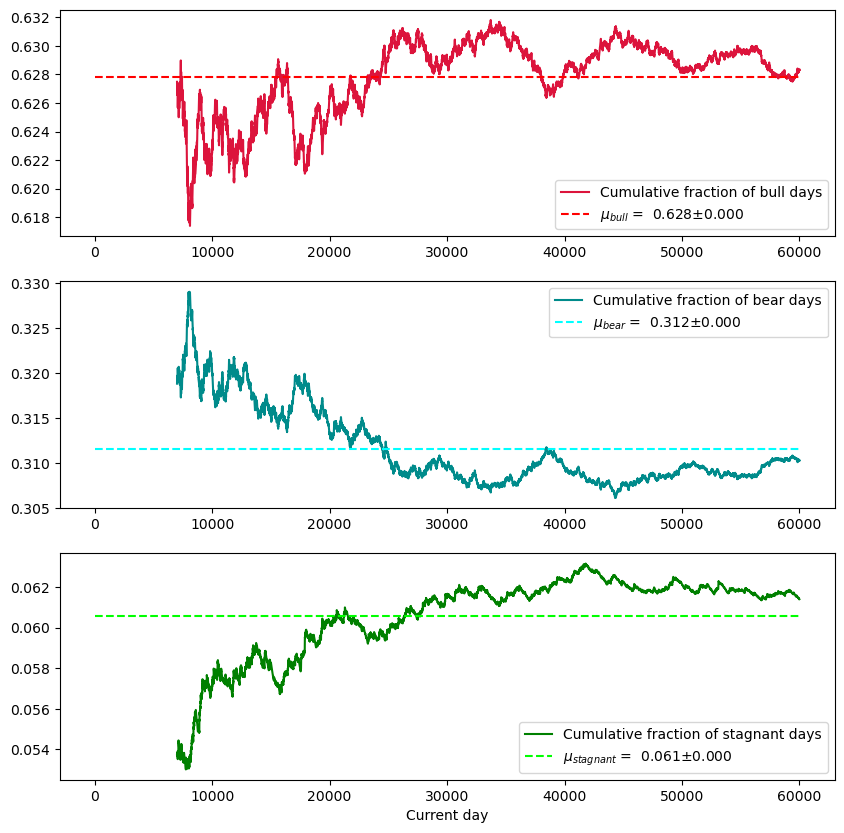

In [11]:
N = 60000

#Run the chain starting from a stagnant day

chain, bear, stagnant, bull = MarketChain(0, N)
days = np.arange(1, N + 1)
burn_in = 7000

days = days[burn_in:]
bull = bull[burn_in:]
bear = bear[burn_in:]
stagnant = stagnant[burn_in:]

#Compute mean and std

bull_mean = np.mean(bull)
bull_std = np.std(bull) / np.sqrt(len(bull))
bull_median = np.median(bull)

bear_mean = np.mean(bear)
bear_std = np.std(bear) / np.sqrt(len(bear))
bear_median = np.median(bear)

stagnant_mean = np.mean(stagnant)
stagnant_std = np.std(stagnant) / np.sqrt(len(stagnant))
stagnant_median = np.median(stagnant)

#Plot the chains

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(days, bull, color="crimson", label="Cumulative fraction of bull days")
ax[1].plot(days, bear, color="darkcyan", label="Cumulative fraction of bear days")
ax[2].plot(days, stagnant, color="green", label="Cumulative fraction of stagnant days")
ax[0].hlines(bull_mean, 1, max(days), linestyle="--", color="red", label="$\mu_{bull}$ = " + f"{bull_mean: .3f}" + "$\pm$" + f"{bull_std:.3f}")
ax[1].hlines(bear_mean, 1, max(days), linestyle="--", color="cyan", label="$\mu_{bear}$ = " + f"{bear_mean: .3f}" + "$\pm$" + f"{bear_std:.3f}")
ax[2].hlines(stagnant_mean, 1, max(days), linestyle="--", color="lime", label="$\mu_{stagnant}$ = " + f"{stagnant_mean: .3f}" + "$\pm$" + f"{stagnant_std:.3f}")
plt.xlabel("Current day")
ax[0].legend()
ax[1].legend()
ax[2].legend()

Text(0.5, 0, 'Days')

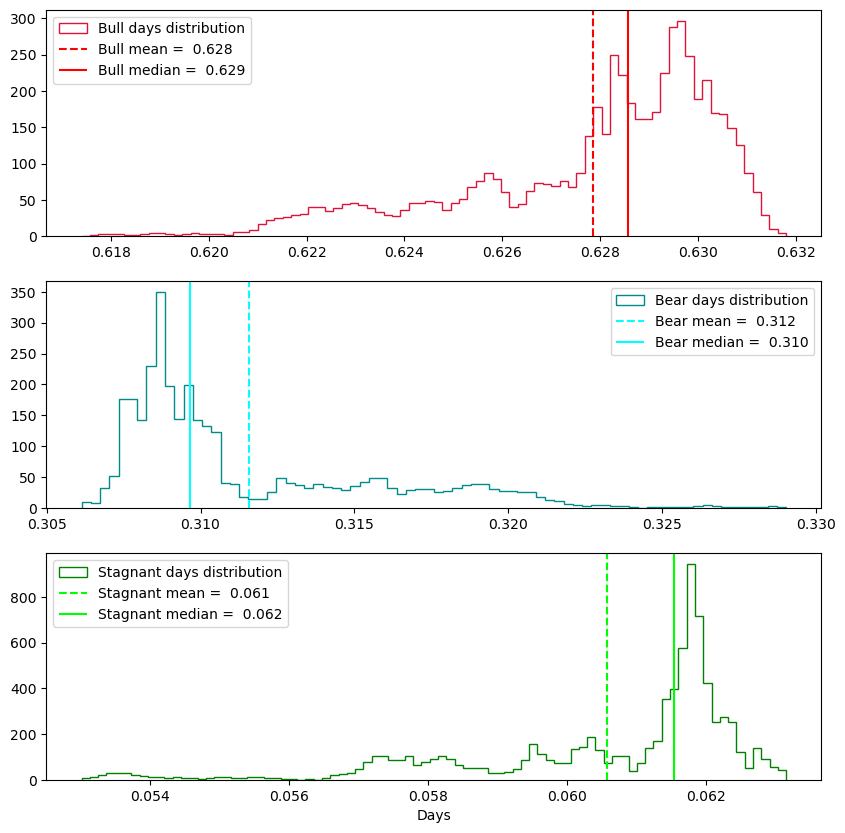

In [12]:
#Plot bull, bear and stagnant distributions

fig_m, ax_m = plt.subplots(3, 1, figsize=(10, 10))
ax_m[0].hist(bull, color="crimson", bins="fd", histtype="step", density=True, label="Bull days distribution")
ax_m[1].hist(bear, color="darkcyan", bins="fd", histtype="step", density=True, label="Bear days distribution")
ax_m[2].hist(stagnant, color="green", bins="fd", histtype="step", density=True, label="Stagnant days distribution")
ax_m[0].vlines(bull_mean, 0, 1, color="red", linestyle="--", transform=ax_m[0].get_xaxis_transform(), label="Bull mean = " + f"{bull_mean: .3f}")
ax_m[1].vlines(bear_mean, 0, 1, color="cyan", linestyle="--", transform=ax_m[1].get_xaxis_transform(), label="Bear mean = " + f"{bear_mean: .3f}")
ax_m[2].vlines(stagnant_mean, 0, 1, color="lime", linestyle="--", transform=ax_m[2].get_xaxis_transform(), label="Stagnant mean = " + f"{stagnant_mean: .3f}")
ax_m[0].vlines(bull_median, 0, 1, color="red", linestyle="-", transform=ax_m[0].get_xaxis_transform(), label="Bull median = " + f"{bull_median: .3f}")
ax_m[1].vlines(bear_median, 0, 1, color="cyan", linestyle="-", transform=ax_m[1].get_xaxis_transform(), label="Bear median = " + f"{bear_median: .3f}")
ax_m[2].vlines(stagnant_median, 0, 1, color="lime", linestyle="-", transform=ax_m[2].get_xaxis_transform(), label="Stagnant median = " + f"{stagnant_median: .3f}")
ax_m[0].legend()
ax_m[1].legend()
ax_m[2].legend()
plt.xlabel("Days")